In [1]:
import numpy as np
import math as m
import matplotlib.pyplot as plt
%matplotlib inline
def f(x):
    return m.cos(3*x)*m.e**(-x) #правая часть уравнения
c=9 ; d=-9        #коэффициенты при слагаемых в левой части
a=1/3 ; b=2/3     #веса в схеме Роте
Y1=[1] ; Y2=[0]   #начальные условия
x0=0 ; x1=2       #интервал
e=0.0001            #относительная точность
h=1               #начальный шаг
k=0               #счетчик итераций
while 1:
    X=np.arange(x0,x1+2*h,h)
    n=1
    r=0
    i=0
    Y1old=Y1
    Y2old=Y2
    Y1=[1]
    Y2=[0]
    while i<(x1+h)/h:
        A=[[1.,-h*b],
          [d*h*b,1.+c*h*b]]
        B=[Y1[i]+h*a*Y2[i],Y2[i]+h*a*(-d*Y1[i]-c*Y2[i]+f(X[i]))+h*b*f(X[i+1])]
        C=np.linalg.solve(A,B)
        Y1.append(C[0])
        Y2.append(C[1])
        i+=1
    if k>0:
        i=0
        while i<(x1+2*h)/(2*h):
            delta=abs((Y1old[i]-Y1[2*i])/Y1old[i])  #Проверка точности
            if delta>e:
                r+=1
            i+=1
        n=r
    k+=1
    if n==0:
        break
    h=h/2
        
print("шаг",h)
print(k,"итераций")

шаг 0.000244140625
13 итераций


In [2]:
#точное решение
l1=(-9+3*m.sqrt(13))/2
l2=(-9-3*m.sqrt(13))/2
c1=((1+26/1117)*l2+26/1117+63/1117)/((l2-l1))
c2=(-(1+26/1117)*l1-26/1117-63/1117)/((l2-l1))
def ex(t):
    ex=c1*m.e**(l1*t)+c2*m.e**(l2*t)+m.e**(-t)*((-26/1117)*m.cos(3*t)+63/1117*m.sin(3*t))
    return ex
T=np.arange(0,2+2*h,h)
exn=[ex(t) for t in T]

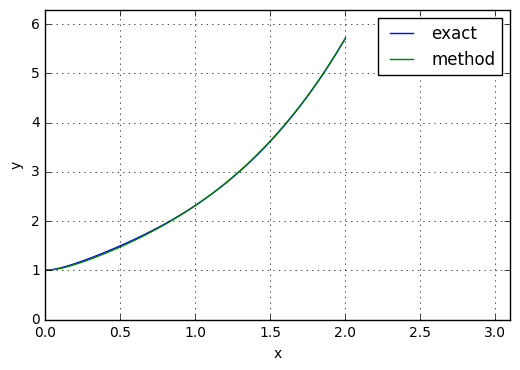

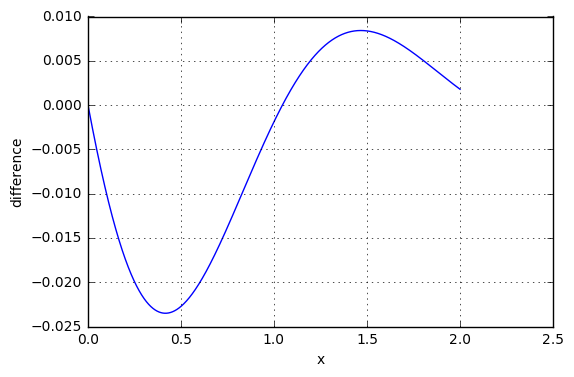

In [3]:
#Графики точного решения и по схеме Роте
plt.plot(T,exn)
plt.plot(X,Y1)
plt.xlim(0,3.1)
plt.ylim(0,6.3)
plt.xlabel('x')
plt.ylabel('y')
plt.legend ( ('exact','method') )
plt.grid()
plt.show()
plt.plot(X,np.array(Y1)-np.array(exn))
plt.xlabel('x')
plt.ylabel(('difference'))
plt.grid()
plt.show()  